<b><h1>Bellman-Ford</h1></b>
<p align="justify">Δίνεται το παρακάτω σχήμα</p>
<img src="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab7/bellman-topology.png"></img>

<b><h3>Ερωτήσεις</h3></b>
<ul>
<li>Να περιγράψετε, συνοπτικά, τη λειτουργία του αλγορίθμου <i>Bellman-Ford</i>.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <i>Bellman-Ford</i> στο γράφο του παραπάνω σχήματος για τις ακμές που συμβολίζονται με μαύρο χρώμα και συνεχή γραμμή. Ως πηγή του αλγορίθμου να θεωρήσετε το <b>AS #2</b>. Ποιο είναι το συνολικό κόστος της διαδρομής από το <b>AS #2</b> στο <b>AS #11</b>; Ποιο είναι το μονοπάτι του δέντρου <i>Bellman-Ford</i> από το <b>AS #2</b> στο <b>AS #11</b>;</li>
<li>Το <b>AS #2</b> εξετάζει την προσθήκη μιας ζεύξης είτε με το <b>AS #4</b> ή με το <b>AS #1</b>. Οι ζεύξεις αυτές φαίνονται στον παραπάνω γράφο με μαύρες διακεκομμένες γραμμές. Γιατί πιστεύετε ότι χρειάζεται το <b>AS #2</b> την επιπλέον αυτή ζεύξη; Ποια από τις παραπάνω ζεύξεις θα πρέπει να προτιμήσει το <b>AS #2</b> για να είναι μικρότερο το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11;</b></li>
<li>Προσθέστε την κατάλληλη ζεύξη, όπως την προσδιορίσατε στο προηγούμενο ερώτημα. Έστω ότι η ζεύξη <b>AS #2</b> – <b>AS #3</b> παθαίνει μια βλάβη. Ποιο είναι, τώρα, το κόστος της διαδρομής από το <b>AS #2</b> μέχρι το <b>AS #11</b>; Πόσο επιβαρύνθηκε σε σχέση με το δεύτερο ερώτημα;</li>
<li>Έστω ότι αποκαθίσταται η βλάβη. Το <b>AS #12</b> προσφέρεται να ενώσει τα <b>AS #10</b> και <b>AS #11</b> απ’ ευθείας στο <b>AS #3</b>. Το <b>AS #12</b> μαζί με τις νέες ακμές που θα προστεθούν φαίνονται με κόκκινο χρώμα στον παραπάνω γράφο. Πόσο θα βελτιωθεί το συνολικό κόστος <b>AS #2</b> – <b>AS #11</b>; Το συγκεκριμένο ερώτημα προσπαθεί να προσομοιώσει τη λειτουργία του GR-IX. Τι είναι το GR-IX (<a href="https://gr-ix.gr">site</a>) και ποιος είναι ο ρόλος του για το ελληνικό Internet;</li>
</ul>
<br>
<i><p align="justify">Για την επιλύση της άσκησης θα χρησιμοποιήσετε τη βιβλιοθήκη της Python <a href="https://pypi.org/project/bellmanford/">bellmanford</a></p></i>

Ο αλγόριθμος Bellman-Ford έχει σαν στόχο να βρει τον κόστος του ελάχιστου μονοπατιού από την πηγή πρός όλους τους κόμβους. Αυτο το επιτυγχάνει με το να ανανεώνει σε κάθε επανάληψη το κόστος προς κάθε κόμβο.

Αρχικά, έχουμε αρχικοποίηση στο άπειρο το κόστος προς όλους τους κόμβους και εξετάζουμε για κάθε κόμβο αν μπορούμε να φτάσουμε με μικρότερο κόστος στους γείτονες του.

Η ανανέωση αυτή επαναλαμβάνεται μέχρι να μην παρατηρήσουμε καμία αλλαγή.
Φυσικά μπορούμε να σημειώνουμε τον κόμβο απο τον οποίο προερχόμαστε και να εξάγουμε και την διαδρομή προς κάθε κόμβο.

In [14]:
!pip install bellmanford

  Created wheel for bellmanford: filename=bellmanford-0.2.1-cp37-none-any.whl size=5035 sha256=1a8a1b822231ed2c2b0cacfc9a5571de211b368aa67ee543ebe9b42494280540
  Stored in directory: /root/.cache/pip/wheels/20/61/3e/dd8db6229092c23e25793b7f2da494b31d870b73d44b4440d6
Successfully built bellmanford


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

import bellmanford as bf

(22.0, [2, 3, 5, 7, 8, 9, 11], False)

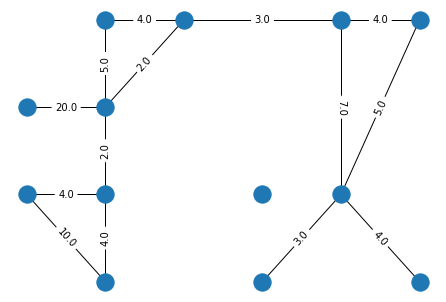

In [21]:
G=nx.Graph()
G.add_node(1,pos=(2,1))
G.add_node(2,pos=(1,2))
G.add_node(3,pos=(2,2))
G.add_node(4,pos=(1,3))
G.add_node(5,pos=(2,3))
G.add_node(6,pos=(2,4))
G.add_node(7,pos=(3,4))
G.add_node(8,pos=(5,4))
G.add_node(9,pos=(5,2))
G.add_node(10,pos=(4,1))
G.add_node(11,pos=(6,1))
G.add_node(12,pos=(4,2))
G.add_node(13,pos=(6,4))
# Εντονες Μαύρες

G.add_edge(1,3,weight=4.0)

#G.add_edge(2,1,weight=10.0)
G.add_edge(2,3,weight=4.0)


G.add_edge(3,1,weight=4.0)
G.add_edge(3,2,weight=4.0)
G.add_edge(3,5,weight=2.0)

G.add_edge(4,5,weight=20.0)

G.add_edge(5,3,weight=2.0)
G.add_edge(5,4,weight=20.0)
G.add_edge(5,6,weight=5.0)
G.add_edge(5,7,weight=2.0)

G.add_edge(6,5,weight=5.0)
G.add_edge(6,7,weight=4.0)

G.add_edge(7,5,weight=2.0)
G.add_edge(7,6,weight=4.0)
G.add_edge(7,8,weight=3.0)

G.add_edge(8,7,weight=3.0)
G.add_edge(8,9,weight=7.0)
G.add_edge(8,13,weight=4.0)

G.add_edge(9,8,weight=7.0)
G.add_edge(9,10,weight=3.0)
G.add_edge(9,11,weight=4.0)
G.add_edge(9,13,weight=5.0)

G.add_edge(10,9,weight=3.0)

G.add_edge(11,9,weight=4.0)

G.add_edge(13,8,weight=4.0)
G.add_edge(13,9,weight=5.0)

pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

bf.bellman_ford(G, 2, 11, weight='weight')

Αν θέσουμε το 2 ως source και το 11 σαν target τότε το ελάχιστον μονοπάτι έχει κόστος 22 και είναι το 2, 3, 5, 7, 8, 9, 11

Ο κόμβος 2 χρείαζεται μια επιπλέον ζεύξη σε περίπτωση που έχουμε βλάβη στη ζεύξη 2-3 και αδυνατούμε να ολοκληρώσουμε τη διαδρομή μας. Η ζεύξη αυτή θα επιτρέψει το μονοπάτι να φτάσει στον κόμβο 5, όπου και έπειτα θα ακολουθήσει την πορεία που αναφέρουμε παραπάνω. Συνεπώς αν έχουε βλάβη στη ζεύξη 2-3 τότε με την προσθήκη της ζεύξης 2-1 θα φτάουμε στον κόμβο 5 με κόστος 16 ενώ αν έχουμε την ζεύξη 2-4 φτάνουμε στον κόμβο 5 με κόστος 24. Συνεπώς επιλέγουμε την ζεύξη 2-1. 

(32.0, [2, 1, 3, 5, 7, 8, 9, 11], False)

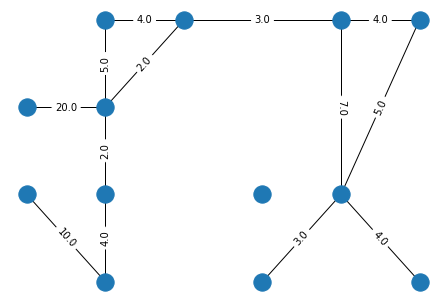

In [24]:
G=nx.Graph()
G.add_node(1,pos=(2,1))
G.add_node(2,pos=(1,2))
G.add_node(3,pos=(2,2))
G.add_node(4,pos=(1,3))
G.add_node(5,pos=(2,3))
G.add_node(6,pos=(2,4))
G.add_node(7,pos=(3,4))
G.add_node(8,pos=(5,4))
G.add_node(9,pos=(5,2))
G.add_node(10,pos=(4,1))
G.add_node(11,pos=(6,1))
G.add_node(12,pos=(4,2))
G.add_node(13,pos=(6,4))
# Εντονες Μαύρες

G.add_edge(1,3,weight=4.0)
G.add_edge(1,2,weight=10.0)


G.add_edge(2,1,weight=10.0)
#G.add_edge(2,3,weight=4.0)


G.add_edge(3,1,weight=4.0)
#G.add_edge(3,2,weight=4.0)
G.add_edge(3,5,weight=2.0)

G.add_edge(4,5,weight=20.0)

G.add_edge(5,3,weight=2.0)
G.add_edge(5,4,weight=20.0)
G.add_edge(5,6,weight=5.0)
G.add_edge(5,7,weight=2.0)

G.add_edge(6,5,weight=5.0)
G.add_edge(6,7,weight=4.0)

G.add_edge(7,5,weight=2.0)
G.add_edge(7,6,weight=4.0)
G.add_edge(7,8,weight=3.0)

G.add_edge(8,7,weight=3.0)
G.add_edge(8,9,weight=7.0)
G.add_edge(8,13,weight=4.0)

G.add_edge(9,8,weight=7.0)
G.add_edge(9,10,weight=3.0)
G.add_edge(9,11,weight=4.0)
G.add_edge(9,13,weight=5.0)

G.add_edge(10,9,weight=3.0)

G.add_edge(11,9,weight=4.0)

G.add_edge(13,8,weight=4.0)
G.add_edge(13,9,weight=5.0)


pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

bf.bellman_ford(G, 2, 11, weight='weight')

Η νέα διαδρομή θα έχει επιβάρυνση +10, επομενως 32 κόστος. Η διαδρομή είναι η εξής :

2, 1, 3, 5, 7, 8, 9, 11

(10.0, [2, 3, 12, 11], False)

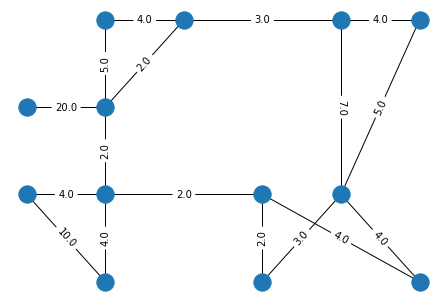

In [26]:
G=nx.Graph()
G.add_node(1,pos=(2,1))
G.add_node(2,pos=(1,2))
G.add_node(3,pos=(2,2))
G.add_node(4,pos=(1,3))
G.add_node(5,pos=(2,3))
G.add_node(6,pos=(2,4))
G.add_node(7,pos=(3,4))
G.add_node(8,pos=(5,4))
G.add_node(9,pos=(5,2))
G.add_node(10,pos=(4,1))
G.add_node(11,pos=(6,1))
G.add_node(12,pos=(4,2))
G.add_node(13,pos=(6,4))
# Εντονες Μαύρες

G.add_edge(1,3,weight=4.0)
G.add_edge(1,2,weight=10.0)


G.add_edge(2,1,weight=10.0)
G.add_edge(2,3,weight=4.0)


G.add_edge(3,1,weight=4.0)
G.add_edge(3,2,weight=4.0)
G.add_edge(3,5,weight=2.0)
G.add_edge(3,12,weight=2.0)

G.add_edge(4,5,weight=20.0)

G.add_edge(5,3,weight=2.0)
G.add_edge(5,4,weight=20.0)
G.add_edge(5,6,weight=5.0)
G.add_edge(5,7,weight=2.0)

G.add_edge(6,5,weight=5.0)
G.add_edge(6,7,weight=4.0)

G.add_edge(7,5,weight=2.0)
G.add_edge(7,6,weight=4.0)
G.add_edge(7,8,weight=3.0)

G.add_edge(8,7,weight=3.0)
G.add_edge(8,9,weight=7.0)
G.add_edge(8,13,weight=4.0)

G.add_edge(9,8,weight=7.0)
G.add_edge(9,10,weight=3.0)
G.add_edge(9,11,weight=4.0)
G.add_edge(9,13,weight=5.0)

G.add_edge(10,9,weight=3.0)
G.add_edge(10,12,weight=2.0)

G.add_edge(11,9,weight=4.0)
G.add_edge(11,12,weight=4.0)

G.add_edge(12,3,weight=2.0)
G.add_edge(12,10,weight=2.0)
G.add_edge(12,11,weight=4.0)

G.add_edge(13,8,weight=4.0)
G.add_edge(13,9,weight=5.0)

pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

bf.bellman_ford(G, 2, 11, weight='weight')

Το νέο κόστος είναι μειωμένο κατα 12 μονάδες , συνεπώς είναι 10 και η νέα διαδρομή είναι η εξής :

2, 3, 12, 11

To GR-IX είναι το μοναδικό Internet Exchange στην Ελλάδα. Δηλαδή προσφέρει Internet Exchange Points στα οποία μπορούν να συνδεθούν διάφοροι πάροχοι και να έχουν είτε άμεση είτε πολύ πιο γρήγορη επικοινωνία μεταξύ τους. Με αυτόν τον τρόπο οι πάροχοι έχουν αρκετά μικρότερο κόστος καθώς η επικοινωνία δεν απαιτεί πολλές συνδέσεις και κοστοβόρες διαδρομές αλλά και οι συνδρομητές των παρόχων έχουν πολύ καλύτερες υπηρεσίες αφου μειώνεται η καθυστέρηση.

Το GR-IX με τις υπηρεσίες του αναβαθμίζει το ελληνικό Internet καθώς μειώνει το κόστος στους παρόχους και κατεπέκταση στους συνδρομητές, μειώνει τις καθυστερήσεις δηλαδή αυξάνονται οι ταχύτητες και τέλος βελτιώνεται το bandwidth.

